<a href="https://colab.research.google.com/github/mithali8/Recommendation-Sytem-For-Farmers/blob/master/ARIMA_farmers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
markets = ['BANGARPET', 'BINNY MILL (F&V)', 'C.R.NAGAR', 'CHICKBALLAPUR', 'DODDABALLAPUR', 'KOLAR', 'MYSURU', 'RAMANAGARA' ]

df = pd.read_csv("/content/drive/My Drive/beet2019-trial.csv")

In [12]:

df = df.fillna(method='ffill')
df.drop(df[df['Market'] == ("Sub Total" or "Grand Total")].index, inplace = True) 
df = df[df['Market'].isin(markets)]

In [20]:
kolar = df.loc[df['Market'] == 'MYSURU']
kolar


,Market,Date,Grade,Arrivals,Unit,Min,Max,Modal
175,MYSURU,01/01/2019,AVERAGE,89,Quintal,800.0,1500.0,1200.0
176,MYSURU,05/01/2019,AVERAGE,86,Quintal,800.0,1500.0,1200.0
177,MYSURU,06/01/2019,AVERAGE,106,Quintal,800.0,1200.0,1000.0
178,MYSURU,09/01/2019,AVERAGE,86,Quintal,800.0,1500.0,1200.0
179,MYSURU,10/01/2019,AVERAGE,106,Quintal,800.0,1500.0,1200.0
...,...,...,...,...,...,...,...,...
2647,MYSURU,26/12/2019,AVERAGE,30,Quintal,1800.0,2000.0,1900.0
2648,MYSURU,27/12/2019,AVERAGE,24,Quintal,2300.0,2500.0,2400.0
2649,MYSURU,29/12/2019,AVERAGE,32,Quintal,2300.0,2500.0,2400.0
2650,MYSURU,30/12/2019,AVERAGE,24,Quintal,2300.0,2500.0,2450.0


In [22]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(kolar)
 
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return np.array(diff)
def inverse_difference(history, yhat, interval=1):
  
  return yhat + history[-interval]

kolar_new = difference(kolar['Modal'].values)

In [23]:
model = ARIMA(kolar_new, order=(3,0,2))
model_fit = model.fit(disp=0)
forecast = model_fit.predict(0,40)
#forecast = inverse_difference(kolar['Modal'].values, forecast, 143)
history = [x for x in kolar['Modal'].values]
day = 1
res = []
for yhat in forecast:
  inverted = inverse_difference(history, yhat, 279)
  print('Day %d: %f' % (day, inverted))
  res.append(inverted)
  history.append(inverted)
  day += 1

Day 1: 1204.494883
Day 2: 1206.269198
Day 3: 1099.104916
Day 4: 1162.447706
Day 5: 1206.344624
Day 6: 1323.967479
Day 7: 1258.164440
Day 8: 1205.679928
Day 9: 1248.113399
Day 10: 1233.999828
Day 11: 1457.830009
Day 12: 1417.670688
Day 13: 1262.202398
Day 14: 1283.635808
Day 15: 1421.961480
Day 16: 1501.503933
Day 17: 1507.097988
Day 18: 1586.656421
Day 19: 1594.869750
Day 20: 1405.531705
Day 21: 1342.411324
Day 22: 1337.363107
Day 23: 1280.614585
Day 24: 1246.329556
Day 25: 1228.662388
Day 26: 1313.778125
Day 27: 1258.132993
Day 28: 1309.416743
Day 29: 1376.364749
Day 30: 1273.191166
Day 31: 1249.733025
Day 32: 1353.717558
Day 33: 1375.202508
Day 34: 1363.903511
Day 35: 1384.428261
Day 36: 1397.573023
Day 37: 1404.416471
Day 38: 1407.839811
Day 39: 1409.537086
Day 40: 1410.376863
Day 41: 1175.958125


In [ ]:
kolar['Modal']

49      1200.0
50      1350.0
51      1300.0
52      1300.0
53      1250.0
         ...  
2525    1600.0
2526    1900.0
2527    1800.0
2528    1450.0
2529    1400.0
Name: Modal, Length: 290, dtype: float64

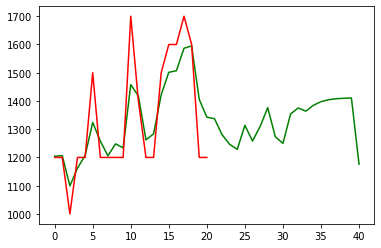

In [24]:
import matplotlib.pyplot as plt
actual = kolar['Modal'].values[0:21]
plt.plot(res, color = "green")
plt.plot(actual, color = "red")
#z = np.mean(np.abs((actual - res) / actual)) * 100
#print("MAPE:", z)

(-12.317480567680262,
 6.869495401896166e-23,
 3,
 274,
 {'1%': -3.4544435065994437,
  '10%': -2.572422013959188,
  '5%': -2.8721468827772774},
 3585.2102025231093)

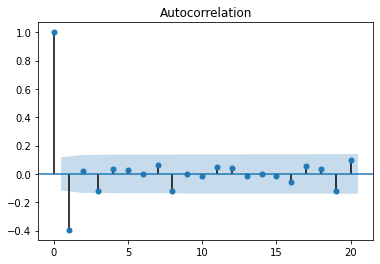

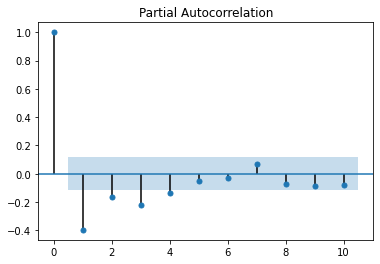

In [15]:
check = np.diff(kolar['Modal'])

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(check, lags = 20) #ma = 
plot_pacf(check, lags = 10) #ar = 4
from statsmodels.tsa.stattools import adfuller
result = adfuller(check)
result